In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv("realistic_fraud_dataset.csv")

In [3]:
# Drop IDs and timestamp if not used directly
df = df.drop(columns=["sender_id", "recipient_id", "device_id", "timestamp"])


In [4]:
# Split features/labels
X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]

In [5]:
# Identify feature types
numeric_features = ["amount", "time_of_day", "day_of_week", "avg_amount_last_10", 
                    "txn_count_last_24h", "recipient_diversity", "geo_distance_km"]

categorical_features = ["transaction_type", "is_known_recipient", "ip_change_flag"]


In [6]:
# Preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

In [7]:
# Model pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", HistGradientBoostingClassifier(random_state=42))
])

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [9]:
# ✅ Fit model
pipeline.fit(X_train, y_train)

c:\Users\Dhara\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Dhara\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'time_of_day',
                                                   'day_of_week',
                                                   'avg_amount_last_10',
                                                   'txn_count_last_24h',
                                                   'recipient_diversity',
                                                   'geo_distance_km']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['transaction_type',
                                                   'is_known_recipient',
                                                   'ip_change_flag'])])),
                ('classifier',
                 HistGradientBoostingClassifier(random_state=42))])

In [10]:
# 🔍 Evaluate
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]


In [11]:
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("✅ ROC AUC Score:", roc_auc_score(y_test, y_proba))

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98    272016
           1       0.96      0.68      0.79     29726

    accuracy                           0.97    301742
   macro avg       0.96      0.84      0.89    301742
weighted avg       0.97      0.97      0.96    301742

✅ Confusion Matrix:
 [[271157    859]
 [  9596  20130]]
✅ ROC AUC Score: 0.920809610337698


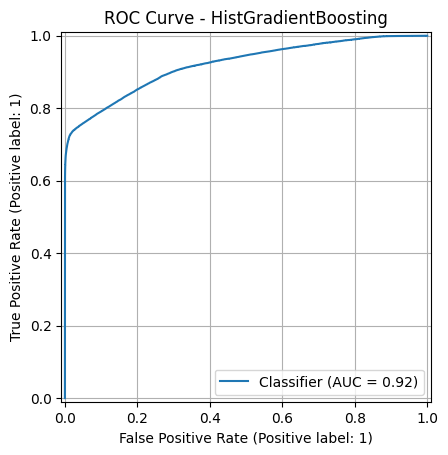

In [12]:
# Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - HistGradientBoosting")
plt.grid(True)
plt.show()

In [13]:
threshold = 0.3
y_pred_custom = (y_proba >= threshold).astype(int)

print(f"Classification Report (threshold={threshold}):\n", classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))


Classification Report (threshold=0.3):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    272016
           1       0.91      0.71      0.79     29726

    accuracy                           0.96    301742
   macro avg       0.94      0.85      0.89    301742
weighted avg       0.96      0.96      0.96    301742

Confusion Matrix:
 [[269831   2185]
 [  8737  20989]]


In [14]:
pip install imbalanced-learn




   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ----------

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



In [18]:
# Preprocess training data only
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE

# After preprocessing but before model training
X_preprocessed = preprocessor.fit_transform(X_train)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y_train)

# Train model directly on res# SMOTE resampling to handle imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)
ampled data
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_resampled, y_resampled)
